# Исследование объявлений о продаже квартир

## Цель и задачи проекта

*Цель проекта:*
- Научиться определять рыночную стоимость объектов недвижимости для построения автоматизированной системы, отслеживающей аномалии и мошенническую деятельность на рынке купли-продажи объектов недвижимости. 

*Для достижения цели проекта следует выполнить следующие задачи:*
1. Провести первичный анализ входных данных;
2. Провести предобработку данных и оценить ее качество;
3. Рассчитать параметры необходимые для проведения исследовательского анализа данных;
4. Изучить влияние параметров (площадь, цена, число комнат и т.д.) на стоимость объектов недвижимости;
5. Определить факторы оказывающих наибольшее воздействие на стоимость объектов недвижимости;
6. Сформировать выводы по результатом проведенного исследования.


## Описание входных данных

**Источник данных:** сервис Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

**Виды данных:** 
*Ручные* - вписаны пользователем;
*Автоматические* - получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма и т.п.).

**Наименования столбцов, описание их содержания и единицы измерения:** 
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении 

## Оглавление:

1. [Открытие данных и изучение общей информации](#start)
2. [Предобработка данных](#preprocessing)  <a id="preprocessing"></a>
    * [Обработка пропущенных значений](#null)
    * [Замена типа данных](#type) 
3. [Расчет дополнительных параметров и их добавление в таблицу](#calculating) 

4. [Исследовательский анализ данных](#analysis)  
5. [Общий вывод](#result) 

## 1. Открытие данных и изучение общей информации <a id="start"></a>

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
#откроем таблицу
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#Получим общую информацию о предоставленных данных
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

None

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#Проверим информацию в столбцах, содержащих булевы значения, посмотрим на соотношение
print(df['is_apartment'].value_counts())
print(df['studio'].value_counts())
print(df['open_plan'].value_counts())

False    2725
True       50
Name: is_apartment, dtype: int64
False    23550
True       149
Name: studio, dtype: int64
False    23632
True        67
Name: open_plan, dtype: int64


In [5]:
#Проверим, что причиной существенной доли пропусков в колонках, заполняемых автоматически на основе картографических данных, 
#является отсутствие выгрузки по ряду квартир
print(len(df.query(
    'airports_nearest.isna() & cityCenters_nearest.isna() & parks_around3000.isna() & ponds_around3000.isna() & parks_nearest.isna() & ponds_nearest.isna()')))

print(len(df.query('parks_nearest.isna() & ponds_nearest.isna()')))

print(df.query(
    '~(airports_nearest.isna() & cityCenters_nearest.isna() & parks_around3000.isna() & ponds_around3000.isna() & parks_nearest.isna() & ponds_nearest.isna())')
     .info())

5518
11334
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18181 entries, 0 to 23697
Data columns (total 22 columns):
total_images            18181 non-null int64
last_price              18181 non-null float64
total_area              18181 non-null float64
first_day_exposition    18181 non-null object
rooms                   18181 non-null int64
ceiling_height          11561 non-null float64
floors_total            18105 non-null float64
living_area             16901 non-null float64
floor                   18181 non-null int64
is_apartment            2147 non-null object
studio                  18181 non-null bool
open_plan               18181 non-null bool
kitchen_area            16618 non-null float64
balcony                 9372 non-null float64
locality_name           18140 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds

### Вывод 1:

1. **Пропуски в "Автоматических" данных**<br>
    1.1. Столбцы airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 - содержат пропуски - около 23%. 
    Столбцы parks_nearest, ponds_nearest - содержат пропуски 66% и 62% соответственно.<br>
    1.2. В результате изучения общей информации о df мы отметили, что в колонках, заполняемых автоматически: airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000, parks_nearest, ponds_nearest, в 5'518 наблюдениях пропуски возникают одновременно. Основной причиной может являтся отсутствие выгрузки по этим объектам недвижимости.<br>
    При этом по среди тех наблюдений, где выгрузка была осуществлена количество пропусков равно (в шт.):
        - airports_nearest - 24;
        - cityCenters_nearest - 1;
        - parks_around3000 - 0;
        - ponds_around3000 - 0;
        - parks_nearest - 10102;
        - ponds_nearest - 9071.
    <br>1.3. Все 24 пропуска расстояния до аэропорта относятся к квартирам в Санкт-Петербурге. Т.к. наибольшая доля квартир в Санкт-Петербурге это вполне может быть и совпадением.
    <br>1.4. Аналогично были проверены отдельно parks_nearest и ponds_nearest. В df одновременно отсутствуют показатели по этим двум параметрам в 11'334 наблюдениях (около 75% от общего числа пропусков по этим столбцам). Причиной пропусков может быть то, что в системе установлен лимит расстояния, т.е. парки и водоемы слишком далеко от квартир (расстояние сверх установленного лимита). 
<br>При этом то, что для большей части квартир где пропущены значения до ближайшего парка, пропущены и значения до ближайшего водоема, может быть объяснено тем, что в городах многие водоемы находятся в парках, и если далеко парк, то далеко и водоем.
2. **Некорректный тип данных**<br>
    2.1. В ряде столбцов значениями являются целые числа (количество балконов, этажей, дней и т.п.), но применен тип float64. Поэтому тип данных на int64 следует скорректировать в следующих столбцах: floors_total, balcony, days_exposition.<br>
    2.2. Некоторые столбцы содержат значения цены и расстояния и имееют тип float64. Т.к. значения не содержат знаков после запятой формат также можно сменить на int64. <br>
    2.4. В столбце first_day_exposition тип object следует изменить на тип дата-время.<br>
    2.5. В столбце is_apartment тип object следует изменить на тип bool.<br>
3. **Пропуски в "Ручных" данных**<br>
    3.1. *ceiling_height* - содержит пропуски (38%) - существенная доля, предполагаем, что следует заполнить их исходя из медианы значений высоты потолков. Возможно пользователь не указал данную информацию при ручном заполнении анкеты.<br>
    3.2. *floors_total* - содержит пропуски (0,36%) - можно пренебречь. Возможно пользователь не указал данную информацию при ручном заполнении анкеты.<br>
    3.3. *living_area* - содержит пропуски (8%) - следует заполнить, сгруппировав данные по числу комнат в квартире, расчитать медиану по каждой группе. Возможно пользователь не указал данную информацию при ручном заполнении анкеты.<br>
    3.4. *is_apartment* - содержит пропуски (88,2%). Слишком большой объем данных пропущен и по данному критерию анализ не будет проведен, т.к. отсутствет необходимый объем данных для проведения исследования. Возможно пользователь не указал данную информацию при ручном заполнении анкеты.<br>
    3.5. *kitchen_area* - содержит пропуски (9,6%). Как правило, кухня пропорциональна общей площади квартиры, поэтому следует заполнить, сгруппировав данные по площади квартиры и взяв медиану площади кухни по каждой группе. Возможно пользователь не указал данную информацию при ручном заполнении анкеты.<br>
    3.6. *balcony* - содержит пропуски (48,6%) - возможно, пропуски оставляли из-за отсутствия балкона, пропуски следует заменить нулем. <br>
    3.7. locality_name - содержит пропуски (0,2%) - можно пренебречь и удалить строки.<br>
    3.8. days_exposition - содержит пропуски (13,42%). Возможно данные отсутствуют, т.к. объявление не снято.<br>
4. **Особенности студий и квартир свободной планировки** <br>
    4.1. Studio - только 0,62% квартир студии. Open_plan только у 0,28% квартир - открытая планировка. 
    4.2.*rooms* - 0,8% квартир имеет количество комнат равное 0. Такое количество комнат указано для студий и квартир свободной планировки.
    
   

### 2. Предобработка данных <a id="preprocessing"></a>

#### 2.1. Обработка пропущенных значений  <a id="null"></a>

##### 2.1.1. Обработка пропущенных значений по высоте потолков

In [6]:
# Проверим есть ли выбросы
print(len(df[df['ceiling_height'] < 2.5]))
print(len(df[df['ceiling_height'] > 4.5 ]))

73
42


**Определение границ отсечения высоты потолков** <br>
В соответствии со Сводом правил 54.13330.2011 "Здания жилые многоквартирные" для жилых объектов, расположенных в климатических зонах средней полосы России высота потолков составляет не менее 2,5 м. <br>«Верхняя планка» не прописывается и не регламентируется. При этом эксперты утверждают, что высота потолков в квартирах класса "элит" и "престиж" составляет до 3,20 м. 
В домах старой застройки (дореволюционные и довоенные) высота потолков составляет 3-4 м. В "сталинках" предельная высота потолков составляет 4,5 м. 
<br>Исходя из представленнных данных *выбросами принимается высота потолков до 2,5 м. и выше 4,5 м*. Очевидно, что высота потолка 38 м. при общей площади квартиры 30 м. это выброс. Возможно пользователь допустил ошибку при заполнении анкеты. В результате отсечения выпадает 0,48% наблюдений, однако это позволит наиболее точно заполнить пропуски.


In [7]:
# Введем df_good, в которой соберем данные для исследования
# Очистим ceiling_height от выбросов
df_good_ceiling_height = df.query('2.5 <= ceiling_height <= 4.5')
# Найдем медиану высоты потолков и заполним пропуски
ceiling_height_median = df_good_ceiling_height['ceiling_height'].median()
df['ceiling_height'] = df['ceiling_height'].fillna(ceiling_height_median)

##### 2.1.2. Обработка пропущенных значений по количеству этажей в доме

In [8]:
# Количество пропусков незначительно и существенно не повлияет на результаты исследования
# Удалим строки с пропусками
df.dropna(subset = ['floors_total'], inplace = True) 

##### 2.1.3. Обработка пропущенных значений жилой площади квартиры

In [9]:
# Сгруппируем данные по числу комнат и рассчитаем медиану жилой площади квартиры по группе
# Сформируем словарь
dict_pivot_rooms = dict(df.groupby('rooms')['living_area'].median())
# Заполним пропущенные значения жилой площади квартиры
df['living_area'] = df['living_area'].fillna(df['rooms'].map(dict_pivot_rooms))

##### 2.1.4. Обработка пропущенных значений отметки аппартаменты

In [10]:
# Определить какие квартиры являются аппартаментами не представляется возможным
# Заполним пропуски пустыми значениями
df['is_apartment'] = df['is_apartment'].fillna(value='')

##### 2.1.5. Обработка пропущенных значений площади кухни

In [11]:
# Разобьем значения общей площади квартиры на 4 группы
df['total_area_group'] = pd.qcut(df['total_area'], 4)
# Сгруппируем данные по общей площади и сформируем словарь
dict_area_group = dict(df.groupby('total_area_group')['kitchen_area'].median())
# Заполним пропуски
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'].map(dict_area_group))

##### 2.1.6. Обработка пропущенных значений количества балконов

In [12]:
# Исходим из того, что пропуски означают отсутствие балконов
# Заменим пропуски нулем
df['balcony'] = df['balcony'].fillna(0)

###### 2.1.7. Обработка пропущенных названий населённого пункта

In [13]:
# Удалим строки с пропущенным наименованием населённого пункта
# Используем срез
df = df[df['locality_name'].notnull()]

###### 2.1.8. Обработка пропущенных значений срока размещения объявления

In [14]:
# Срок может зависеть от разных параметров, поэтому заполнять пропуски нулевыми значениями - объявление не снято
df['days_exposition'] = df['days_exposition'].fillna(value=0)

###### 2.1.9. Обработка автоматических пропущенных значений 

In [15]:
#Заполним пропуски в автоматических данных, т.к. их предсказать невозможно, пустыми значениями
df['airports_nearest'] = df['airports_nearest'].fillna(value='')
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value=0.1111) #for filtration
df['parks_around3000'] = df['parks_around3000'].fillna(value='')
df['ponds_around3000'] = df['ponds_around3000'].fillna(value='')
df['parks_nearest'] = df['parks_nearest'].fillna(value='')
df['ponds_nearest'] = df['ponds_nearest'].fillna(value='')

#Сделаем проверку заполнения пропусков
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23565 non-null int64
last_price              23565 non-null float64
total_area              23565 non-null float64
first_day_exposition    23565 non-null object
rooms                   23565 non-null int64
ceiling_height          23565 non-null float64
floors_total            23565 non-null float64
living_area             23565 non-null float64
floor                   23565 non-null int64
is_apartment            23565 non-null object
studio                  23565 non-null bool
open_plan               23565 non-null bool
kitchen_area            23565 non-null float64
balcony                 23565 non-null float64
locality_name           23565 non-null object
airports_nearest        23565 non-null object
cityCenters_nearest     23565 non-null float64
parks_around3000        23565 non-null object
parks_nearest           23565 non-null object
ponds_around3000

### Вывод 2.1:
 Данные содержали значительное количество пропусков. Для их отработки были использованы такие методы как удаление строк с пропусками, где утеря данных была минимальна и некритична, замена предполагаемым значением, например, мы предположили, что отсутствие информации о балконе это его отсутствие. Также для заполнения пропусков, где можно было расчитать примерные значения из-за зависимости от известной нам величины, была использована группировка и заполнение значениями медианы по группе с формированием словарей.

#### 2.1. Замена типа данных<a id="type"></a>

В ряде столбцов значениями являются целые числа (количество балконов, этажей, дней и т.п.), но применен тип float64. Поэтому тип данных на int64 следует скорректировать в следующих столбцах: floors_total, balcony, days_exposition.

In [16]:
#заменим на целочисленный формат количество балконов, этажей, дней размещения объявления
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['days_exposition'] = df['days_exposition'].astype('int')

Столбец last_price содержит значения цены. Т.к. значения не содержат знаков после запятой формат также можно сменить на int64. 

In [17]:
#заменим типы данных на целочисленнный
df['last_price'] = df['last_price'].astype('int')

In [18]:
#в столбце is_apartment тип object следует изменить на тип bool
df['is_apartment'] = df['is_apartment'].astype('bool')

In [19]:
#в столбце first_day_exposition тип object следует изменить на тип datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

### Вывод 2.2:
Мы пришли к выводу, что корректировка уместна для столбцов, в которых значениями являются целые числа (количество балконов, этажей, дней и т.п.), но применен тип float64. Также исходя из содержания ячеек, тип был изменен на тип bool и на тип datetime. Для изменения типа данных был выбран метод astype(), т.к. он оптимален для смены типа данных на целочисленный и иные.

### 3. Расчет дополнительных параметров и добавление в таблицу <a id="calculating"></a>

#### 3.1. Расчет цены квадратного метра

In [20]:
#создадим столбец с стоимостью 1 кв. м.
#разделим цену на площадь
df['price_sqr_meter'] = round(df['last_price'] / df['total_area'], 2)

#### 3.2. Добавление дня недели, месяца и года публикации объявления

In [21]:
#создадим новые столбцы с днем недели, месяцем и годом, выделив из столбца first_day_exposition
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year
#понедельник это 0, воскресенье это 6 - дни недели запишем словами
dict_weekday = {0: 'понедельник', 1: 'вторник', 2: 'среда', 3: 'четверг', 4: 'пятница', 5: 'суббота', 6: 'воскресенье'}
df['name_of_weekday'] = df['weekday'].map(dict_weekday)

#### 3.3. Категоризация по этажу квартиры (первый, последний, другой)

In [22]:
#напишем функцию для категоризации по этажам 
#добавим категории в отдельный столбец
def floor_group(row):
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == total_floor:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'
df['floor_category'] = df.apply(floor_group, axis=1)

#### 3.4. Соотношение жилой и общей площади

In [23]:
#создадим столбец с соотношением жилой и общей площади
#разделим жилую площадь на общую площадь
df['living_space_ratio'] = round(df['living_area'] / df['total_area'], 2)

#### 3.5. Расчет отношения площади кухни к общей площади

In [24]:
#создадим столбец с соотношением площади кухни к общей площади
#разделим площадь кухни на общую площадь
df['kitchen_space_ratio'] = round(df['kitchen_area'] / df['total_area'], 2)
#проверим изменения
display(df.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_group,price_sqr_meter,weekday,month,year,name_of_weekday,floor_category,living_space_ratio,kitchen_space_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863,16028.0,1,482,2,755,0,"(69.8, 900.0]",120370.37,3,3,2019,четверг,другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817,18603.0,0,,0,,81,"(40.0, 52.0]",82920.79,1,12,2018,вторник,первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741,13933.0,1,90,2,574,558,"(52.0, 69.8]",92785.71,3,8,2015,четверг,другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.65,14,45.0,9,False,False,False,13.0,0,Санкт-Петербург,28098,6800.0,2,84,3,234,424,"(69.8, 900.0]",408176.10,4,7,2015,пятница,другой,0.28,0.08
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856,8098.0,2,112,1,48,121,"(69.8, 900.0]",100000.00,1,6,2018,вторник,другой,0.32,0.41


### Вывод 3: 
На данном этапе были успешно расчитаны дополнительные показатели и добавлены в отдельные столбцы. Для добавления года, месяца и дня недели публикации были использаваны методы dt.weekday, dt.month, dt.year. Так как день недели выводился в днях была использована структура данных - словарь. 
<br> Для разделения на типы по этажам была подготовлена функция, проверяющая соответствие условиям на основе которых проводится категоризация. 
<br> Остальные метрики были расчитаны путем деления известных  показателей и округлены до 2 знаков.

### 4. Исследовательский анализ данных  <a id="analysis"></a>

#### 4.1. Изучение параметров: площадь, цена, число комнат, высота потолков

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64


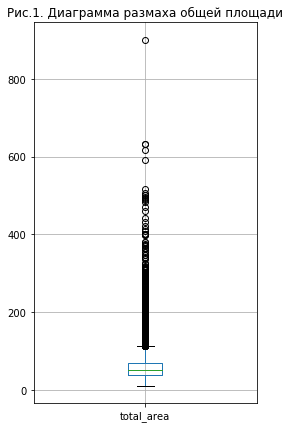

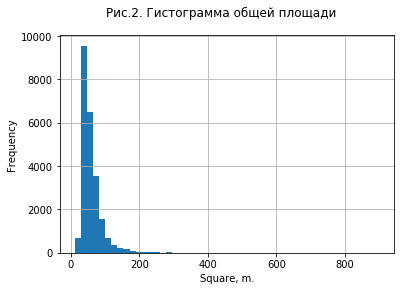

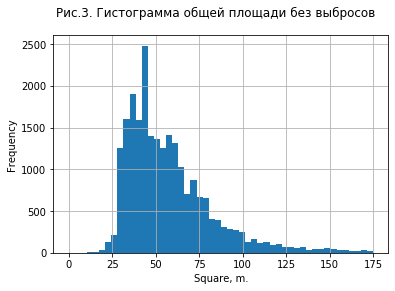

In [25]:
#изучим параметр общая площадь, применив метод describe()
print(df['total_area'].describe())

#построим диаграмму размаха
df.boxplot(column='total_area', figsize=(4, 7))
plt.title('Рис.1. Диаграмма размаха общей площади')
plt.show()
df['total_area'].hist(bins=50)
plt.suptitle('Рис.2. Гистограмма общей площади')
plt.xlabel('Square, m.')
plt.ylabel('Frequency')
plt.show()
df['total_area'].hist(bins=50, range=(0, 175))
plt.suptitle('Рис.3. Гистограмма общей площади без выбросов')
plt.xlabel('Square, m.')
plt.ylabel('Frequency')
plt.show()

### Вывод 4.1:
Исходя из полученной инфрмации среднее равно 60 м2, а медиана 52 м2, следовательно, в данных присутствуют выбросы, которые повышают среднее. Полученная диаграмма размаха подтверждает, что ряд квартир превышает по общей площади 400 м2, а некоторые и 800 м2, однако таких квартир немного, согласно описанию 3 квартиль не превышает 70, таким образом, у 75% квартир площадь не превышает 70 м2. 
<br> Построенная гистограмма общей площади (рис.2) также подтверждает наличие выбросов. На рис 3. Мы полагаем, что отсечение на уровне 175 м2 позволит избавиться от выбросов и сохранить доставерность данных.

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64
763000000


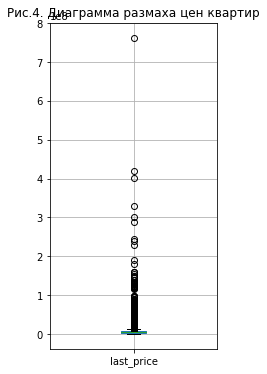

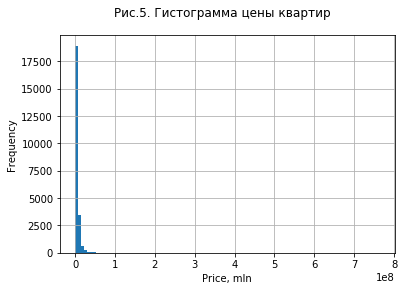

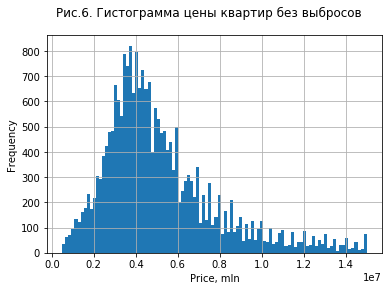

(0, 15000000)

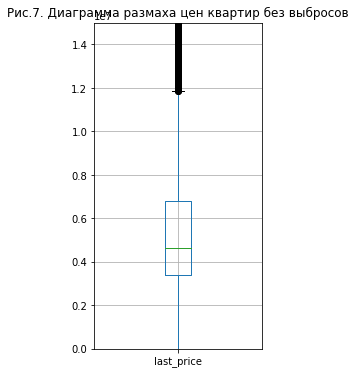

In [26]:
#Изучим параметр цена
print(df['last_price'].describe())
print(df['last_price'].max())
#построим диаграмму размаха
df.boxplot(column='last_price', figsize=(3, 6))
plt.title('Рис.4. Диаграмма размаха цен квартир')
plt.show()
df['last_price'].hist(bins=100, range=(0, 763000000))
plt.suptitle('Рис.5. Гистограмма цены квартир')
plt.xlabel('Price, mln')
plt.ylabel('Frequency')
plt.show()
df['last_price'].hist(bins=100, range=(500000, 15000000))
plt.suptitle('Рис.6. Гистограмма цены квартир без выбросов')
plt.xlabel('Price, mln')
plt.ylabel('Frequency')
plt.show()
df.boxplot(column='last_price', figsize=(3, 6))
plt.title('Рис.7. Диаграмма размаха цен квартир без выбросов')
plt.ylim(0, 15000000)

### Вывод 4.2:
Исходя из полученной инфрмации средняя цена квартиры 6,5 млн. руб., при этом медианная стоимость значительно ниже - 4,5 млн. руб. Разница обусловлена значительными выбросами (наличием квартир очень высокой стоимости). Максимальная цена составляла 736 млн. руб. Кроме этого, минимальная цена составила около 12 тыс. руб., что крайне мало для покупки недвижимости. 
<br>
Анализ гистограмм цены квартир позволил определить границы для избегания выбросов. Для исследования была принята стоимость квартир от 500 тыс.руб до 15 000 тыс. руб.

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


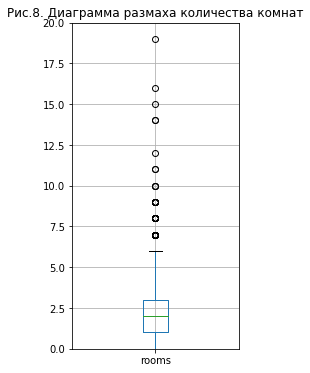

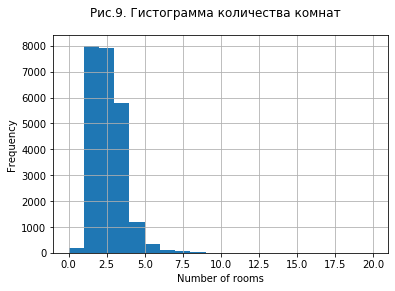

Text(0, 0.5, 'Frequency')

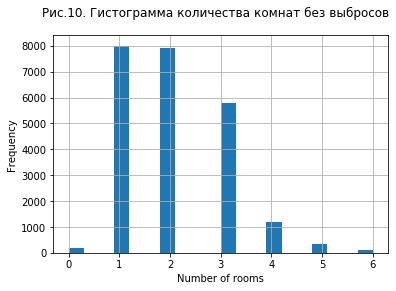

In [27]:
#Изучим параметр число комнат
print(df['rooms'].describe())
#построим диаграмму размаха
df.boxplot(column='rooms', figsize=(3, 6))
plt.ylim(0, 20)
plt.title('Рис.8. Диаграмма размаха количества комнат')
plt.show()
df['rooms'].hist(bins=20, range=(0, 20))
plt.suptitle('Рис.9. Гистограмма количества комнат')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')
plt.show()
df['rooms'].hist(bins=20, range=(0, 6))
plt.suptitle('Рис.10. Гистограмма количества комнат без выбросов')
plt.xlabel('Number of rooms')
plt.ylabel('Frequency')



### Вывод 4.3:
Исходя из общей информации о столбце rooms мы видим, что минимальное число комнат 0. Как мы выяснили на первом этапе 0 комнат применимо к студиям и квартирам открытой планировки. Максимальное чило комнат составляет 19, так называемый артефакт в данных.
<br> Изучение диаграммы частот и гистограммы количества комнат позволило определить, что более 6 комнат встречается крайне редко, поэтому превышение будем принимать за выбросы. 
<br> Кроме этого, стоит отметить, что для данного столбца объем выбросов невелик, медиана и среднее значение почти равны между собой.
<br> Наиболее часто встречающимися являются однокомнатные и двухкомнатные квартиры (около 8000 каждого типа), трехкомнатные - не превышает 6000 квартир и четырехкомнатные чуть больше 1000 квартир. Остальных типов квартир значительно меньше.

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64


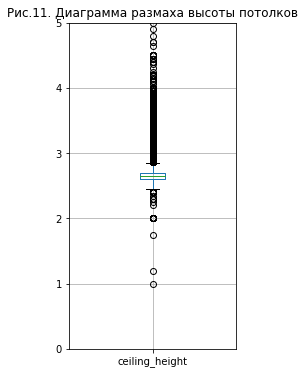

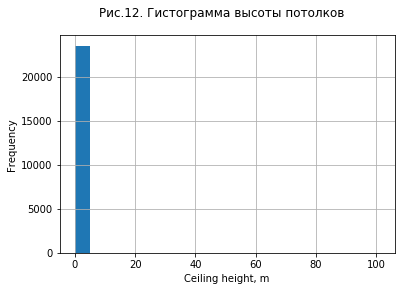

Text(0, 0.5, 'Frequency')

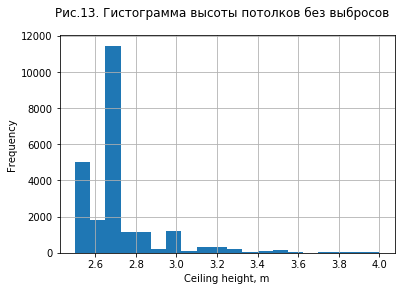

In [28]:
#Изучим параметр высота потолков
print(df['ceiling_height'].describe())
#построим диаграмму размаха
df.boxplot(column='ceiling_height', figsize=(3, 6))
plt.ylim(0, 5)
plt.title('Рис.11. Диаграмма размаха высоты потолков')
plt.show()
df['ceiling_height'].hist(bins=20, range=(0, 101))
plt.suptitle('Рис.12. Гистограмма высоты потолков')
plt.xlabel('Ceiling height, m')
plt.ylabel('Frequency')
plt.show()
df['ceiling_height'].hist(bins=20, range=(2.5, 4))
plt.suptitle('Рис.13. Гистограмма высоты потолков без выбросов')
plt.xlabel('Ceiling height, m')
plt.ylabel('Frequency')

### Вывод 4.4:
В данных по высоте потолков присутствуют выбросы. Максимум высота 100 м., минимум - 1 м. Среднее значение высоты потолков слегка превышает медиану, причина - выбросы, которы представлены на Диаграмме размаха высоты потолков.
В соответствии со Сводом правил 54.13330.2011 "Здания жилые многоквартирные" для жилых объектов, расположенных в климатических зонах средней полосы России высота потолков составляет не менее 2,5 м.
«Верхняя планка» не прописывается и не регламентируется. При этом эксперты утверждают, что высота потолков в квартирах класса "элит" и "престиж" составляет до 3,20 м. В домах старой застройки (дореволюционные и довоенные) высота потолков составляет 3-4 м. В "сталинках" предельная высота потолков составляет 4 м.
Исходя из представленнных данных выбросами принимается высота потолков до 2,5 м. и выше 4 м. 

count    23565.000000
mean       156.420115
std        213.517293
min          0.000000
25%         22.000000
50%         73.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64


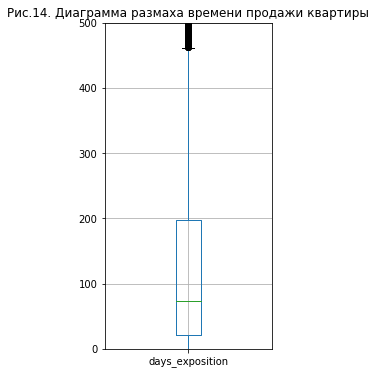

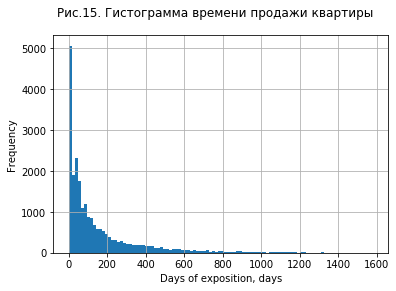

Text(0, 0.5, 'Frequency')

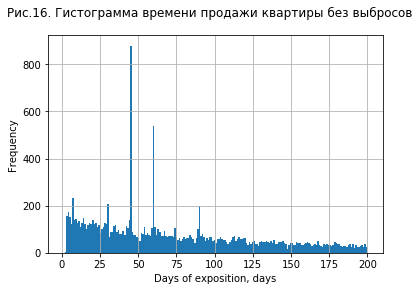

In [29]:
# Проанализируем время продажи квартиры

#Изучим параметр высота потолков
print(df['days_exposition'].describe())
#построим диаграмму размаха
df.boxplot(column='days_exposition', figsize=(3, 6))
plt.ylim(0, 500)
plt.title('Рис.14. Диаграмма размаха времени продажи квартиры')
plt.show()
df['days_exposition'].hist(bins=100, range=(0, 1580))
plt.suptitle('Рис.15. Гистограмма времени продажи квартиры')
plt.xlabel('Days of exposition, days')
plt.ylabel('Frequency')
plt.show()
df['days_exposition'].hist(bins=200, range=(1, 200))
plt.suptitle('Рис.16. Гистограмма времени продажи квартиры без выбросов')
plt.xlabel('Days of exposition, days')
plt.ylabel('Frequency')

### Вывод 4.5:
Среднее время продажи квартиры составляет 156 дней, при этом медиана составляет 73 дня, более чем в два раза меньше. Это обусловлено значительным объемов выбросов, которые можно увидеть на диаграмме размаха после около 480 дней. 
<br>Наиболее преемлемым и частым вариантом мы считаем продажу, которая длится около 75 дней. Исходя из анализа диаграммы мы можем счиать, что продажи прошли очень быстро, если время продажи до 35-40 дней, при этом продажи длятся необычно долго, если время продажи свыше 125 дней.

In [30]:
# Очистим данные от выбросов
# Используем метод query
df_cleaned = df.query('total_area < 175 & 500000 < last_price < 15000000 & 0 <= rooms <= 6 & 2.5 <= ceiling_height <= 4 & 0 < days_exposition < 480')
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17664 entries, 1 to 23695
Data columns (total 31 columns):
total_images            17664 non-null int64
last_price              17664 non-null int64
total_area              17664 non-null float64
first_day_exposition    17664 non-null datetime64[ns]
rooms                   17664 non-null int64
ceiling_height          17664 non-null float64
floors_total            17664 non-null int64
living_area             17664 non-null float64
floor                   17664 non-null int64
is_apartment            17664 non-null bool
studio                  17664 non-null bool
open_plan               17664 non-null bool
kitchen_area            17664 non-null float64
balcony                 17664 non-null int64
locality_name           17664 non-null object
airports_nearest        17664 non-null object
cityCenters_nearest     17664 non-null float64
parks_around3000        17664 non-null object
parks_nearest           17664 non-null object
ponds_around3000

#### 4.2. Определение факторов больше всего влияющих на стоимость квартиры

##### 4.2.1. Определение зависимости цены от площади

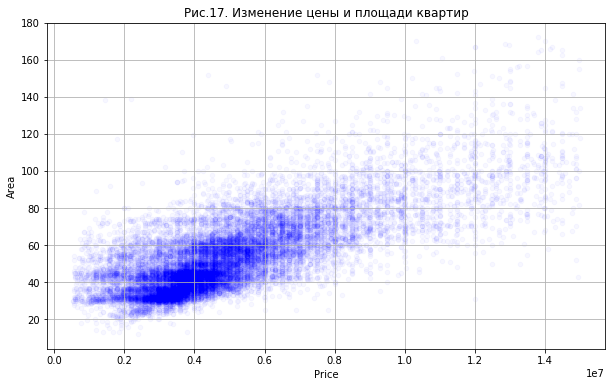

0.746131192248369


In [31]:
#построим диаграмму рассеяния
df_cleaned.plot(x='last_price', y='total_area', kind='scatter', color='blue', title='Рис.17. Изменение цены и площади квартир', figsize=(10, 6), sharex=False, grid=True, alpha=0.03)
plt.xlabel('Price')
plt.ylabel('Area')
plt.show()
#определим коэффициент корреляции
price_area_corr = df_cleaned['last_price'].corr(df_cleaned['total_area'])
print(price_area_corr)

### Вывод 4.6:
Цена квартиры имеет прямую зависимость от площади квартиры, чем больше площадь квартиры, тем выше цена. Однако, конечно, существуют исключения, например, на диаграмме рассеяния "Изменение цены и площади квартир" квартиру 140 м.2 за менее, чем 2 млн. руб.
Тем не менее коэффициент корреляции равен 0,746, что говорит о высокой степени зависимости показателя цены от параметра площади квартиры.

##### 4.2.2. Определение зависимости цены от количества комнат

Коэффициент корреляции: 0.49


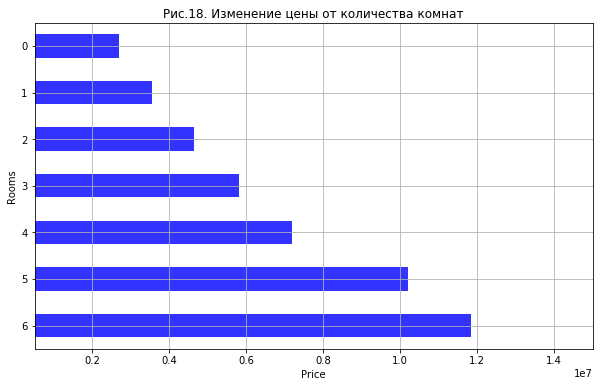

In [32]:
#построим график отражающий зависимость медианного значения цен от количества комнат
(df_cleaned
     .pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'median')
     .sort_values(by='last_price', ascending=False)
     .plot(y='last_price', kind='barh', color='blue', title='Рис.18. Изменение цены от количества комнат', figsize=(10, 6), legend=False, alpha=0.8, grid=True, xlim=(500000, 15000000))
) 
plt.xlabel('Price')
plt.ylabel('Rooms')

#определим коэффициент корреляции
price_rooms_corr = df_cleaned['last_price'].corr(df_cleaned['rooms'])
print('Коэффициент корреляции:', round(price_rooms_corr, 2))


### Вывод 4.7:
Зависимость между ценой и количеством комнат представлена на графике, который отражает зависимость медианы стоимости квартиры от количества комнат. Закономерность выявляется следующая: чем больше комнат в квартире, тем выше стоимость квартиры. Рассчитанный коэффициент корреляции не противоречит полученным выводам, однако связь между ценой и количествам комнат менее слабая, чем между ценой и площадью квартиры. 

##### 4.2.3. Определение зависимости цены от расстояния до центра города

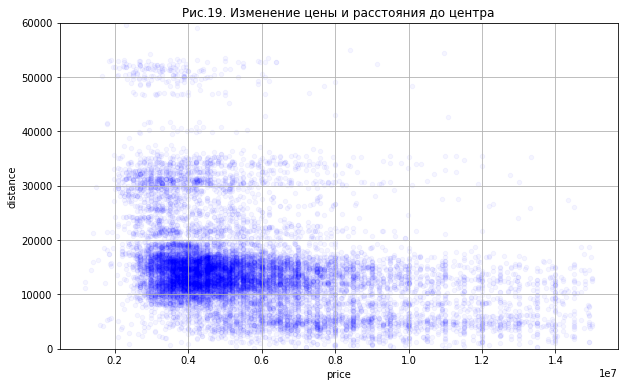

Коэффициент корреляции: 0.06


In [33]:
(df_cleaned
     .query('cityCenters_nearest != 0.1111')
     .plot(x='last_price', y='cityCenters_nearest', kind='scatter', color='blue', title='Рис.19. Изменение цены и расстояния до центра', figsize=(10, 6), sharex=False, grid=True, alpha=0.04, ylim=(0, 60000))
)
plt.xlabel('price')
plt.ylabel('distance')
plt.show()

corr_price_distance = df_cleaned['last_price'].corr(df_cleaned['cityCenters_nearest'])
print('Коэффициент корреляции:', round(corr_price_distance, 2))

### Вывод 4.8:
Связь между ценой квартиры и расстоянием до центра крайне мало, коэффициент корреляции равен 0,06, при этом он положительный. Хотя логично предположить, что чем ближе центр, тем выше должна быть стоимость.
<br> Наиболее популярны в объявлениях квартиры 10-18 км. от центра и стоимостью 2,5 - 5 млн. руб.

##### 4.2.4. Определение зависимости цены от этажа квартиры

Text(0, 0.5, 'Floor')

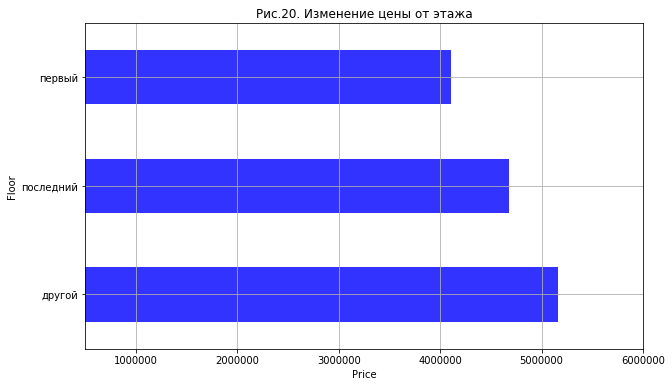

In [34]:
#построим график по данным сгруппированным по категории этажа
(df_cleaned
     .pivot_table(index = 'floor_category', values = 'last_price', aggfunc = 'mean')
     .sort_values(by='last_price', ascending=False)
     .plot(y='last_price', kind='barh', color='blue', title='Рис.20. Изменение цены от этажа', figsize=(10, 6), legend=False, alpha=0.8, grid=True, xlim=(500000, 6000000))
) 
plt.xlabel('Price')
plt.ylabel('Floor')

### Вывод 4.9:
Мы выявили зависимость между видом этажа и ценой квартиры. Таким образом, квартиры на первом этаже в среднем имеют наименьшую стоимость. Квартиры на последнем этаже также пользуются меньшим спросом и, соответственно, имеют меньшую стоимсть. Наиболее дорогие квартиры на "других" этажах - разница с первым этажем составляет более 1 млн. руб.

##### 4.2.4. Определение зависимости цены от даты размещения: дня недели, месяца и года

Text(0, 0.5, 'Year')

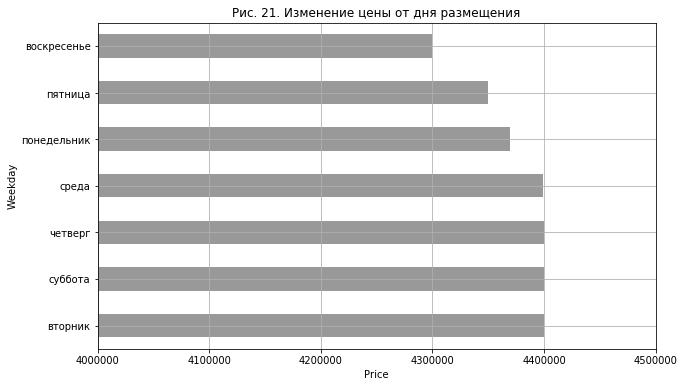

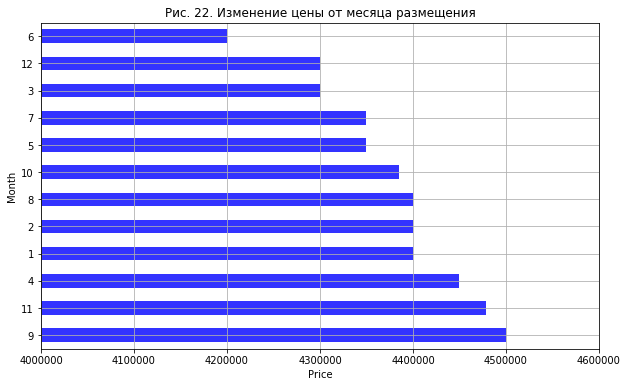

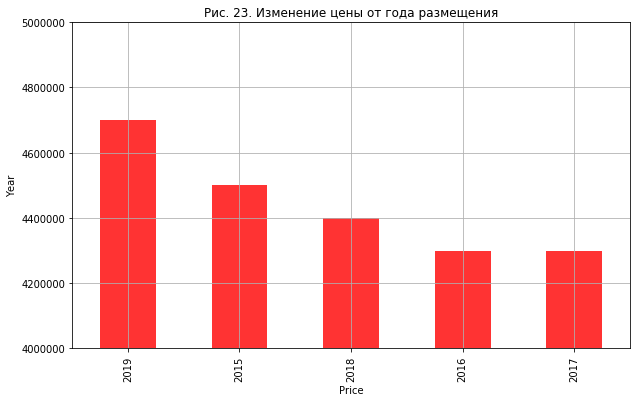

In [35]:
#изучим изменение стоимости в зависимости от дня недели
(df_cleaned
     .pivot_table(index = 'name_of_weekday', values = 'last_price', aggfunc = 'median')
     .sort_values(by='last_price', ascending=False)
     .plot(y='last_price', kind='barh', color='gray', title='Рис. 21. Изменение цены от дня размещения', figsize=(10, 6), legend=False, alpha=0.8, grid=True, xlim=(4000000, 4500000))
) 
plt.xlabel('Price') 
plt.ylabel('Weekday')

#изучим изменение стоимости в зависимости от месяца
(df_cleaned
     .pivot_table(index = 'month', values = 'last_price', aggfunc = 'median')
     .sort_values(by='last_price', ascending=False)
     .plot(y='last_price', kind='barh', color='blue', title='Рис. 22. Изменение цены от месяца размещения', figsize=(10, 6), legend=False, alpha=0.8, grid=True, xlim=(4000000, 4600000))
) 
plt.xlabel('Price') 
plt.ylabel('Month')

#изучим изменение стоимости в зависимости от года
(df_cleaned
     .pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
     .sort_values(by='last_price', ascending=False)
     .plot(y='last_price', kind='bar', color='red', title='Рис. 23. Изменение цены от года размещения', figsize=(10, 6), legend=False, alpha=0.8, grid=True, ylim=(4000000, 5000000))
) 
plt.xlabel('Price')
plt.ylabel('Year') 

### Вывод 4.10:
Мы визуализировали на графике изменение средней цены квартиры в зависимости от **дня недели публикации объявления**, результат сведетельствует, что есть колебания стоимости. Если объявление опубликовано в выходные дни, то средняя стоимость немного меньше. При этом по объявлениям, размещенным во вторник и четверг наблюдается максимальная стоимость. Колебание между максимальным и минимальным значением составляет около 2%. Таким образом, *день недели публикации объявления существенно не влияет на цену*.
<br>Мы визуализировали на графике изменение средней цены квартиры в зависимости от **месяца публикации объявления**, результат сведетельствует, что также есть незначительные изменения стоимости. Наибольшая средняя стоимость наблюдается в сентябре и ноябре, а наибольший спад цены на объявления опубликованные в июне. Однако цены изменяются довольно хаотично в зависимости от месяца и *сезонность публикации выделить не представляется возможным*.
<br>Мы визуализировали на графике изменение средней цены квартиры в зависимости от **года публикации объявления**.Здесь уже более четко прослеживается зависимость: с течением времени недвижимость дорожает, тем не менее выделяются и разовые всплески, например, в 2015 наблюдается высокий уровень цен на недвижимость, предполагаем, что это может быть связано с политикой "дорогих кредитов", проводимой ЦБ РФ, учетная ставка достигала 17% годовых. При этом экономический кризис и инфляция стимулировали спрос на недвижимость как инвестиционный актив. Наиболее высокая стоимость наблюдается в 2019 г., что обусловлено всплеском спроса на недвижимость из-за резкого снижения ставок по кредитам. 
<br> Тем не менее, несмотря на то, что стоимость квартиры изменяется в зависимости от года, прямой зависимости между годом публикации и стоимостью, мы полагаем, нет. Т.к. в данном случае стоимость изменялась от макроэкономической ситуации в стране, а не от даты публикации.

#### 4.3. Изучение стоимости жилья в населённых пунктах с наибольшим числом объявлений

Санкт-Петербург      11512
посёлок Мурино         477
посёлок Шушары         384
Всеволожск             304
Колпино                289
посёлок Парголово      282
деревня Кудрово        265
Пушкин                 262
Гатчина                241
Выборг                 188
Name: locality_name, dtype: int64


Text(0, 0.5, 'Year')

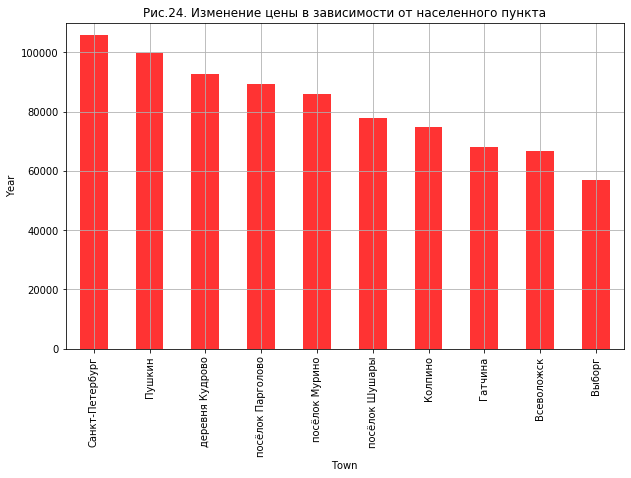

In [36]:
#выберем 10 населённых пунктов с наибольшим числом объявлений
top_ten_ad = df_cleaned['locality_name'].value_counts().head(10)
print(top_ten_ad)

#сделаем срез по полученным населенным пунктам
df_top_ten_ad = df_cleaned.query('locality_name in @top_ten_ad.index')

#определим среднюю цену квадратного метра в этих населённых пунктах
#определим среди топ-10 населенные пункты с самой высокой и низкой стоимостью жилья
df_top_ten_pivot = (df_top_ten_ad
                    .pivot_table(index='locality_name', values = 'price_sqr_meter', aggfunc = 'mean')
                    .sort_values(by='price_sqr_meter', ascending=False)
                    .plot(y='price_sqr_meter', kind='bar', color='red', title='Рис.24. Изменение цены в зависимости от населенного пункта', figsize=(10, 6), legend=False, alpha=0.8, grid=True, ylim=(0, 110000))
) 
plt.xlabel('Town')
plt.ylabel('Year') 

### Вывод 4.11:
Анализ 10 населенных пунктов с наибольшим количеством объявлений позволи построить график, отражающий населённые пункты по убыванию средней стоимости квадратного метра квартиры. Мы получили вполне логичные результаты лидером по стоимости жилья стал Санкт-Петербург, где средняя стоимость квартиры превышает 100 000 руб. за кв. м. При этом наименьшие цены характрены для Выборга, где средняя стоимость квартиры не превышает 60 000 руб. за кв. м.

#### 4.4. Изучение изменения стоимости квартиры при отдалении от центра города

Text(0, 0.5, 'Price')

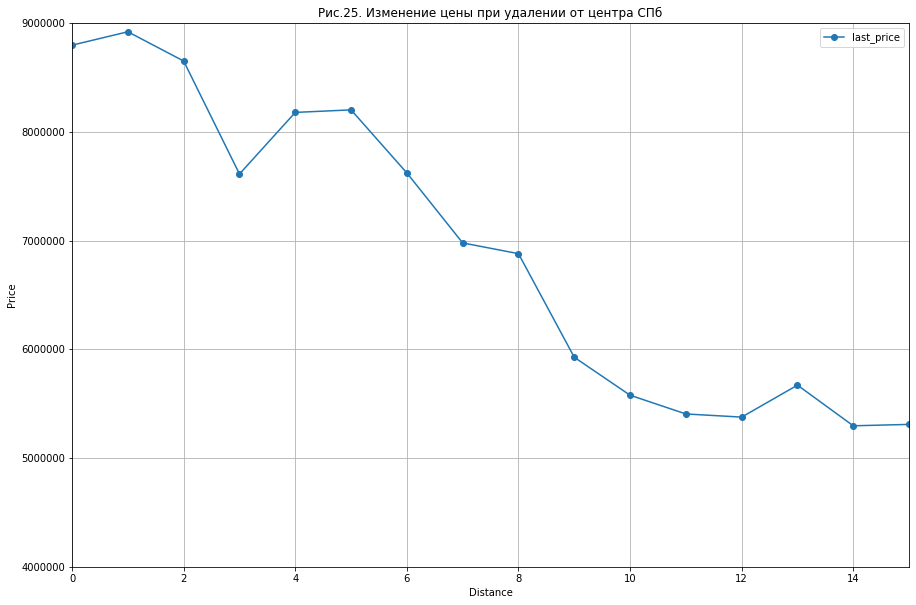

In [37]:
#сделаем срез где населенный пункт Санкт-Петербург, исключив пустые значения
df_spb = df_cleaned.query('locality_name == "Санкт-Петербург" and cityCenters_nearest != 0.1111').reset_index(drop=True)

#переведем расстояние до центра в км и округлим до целого значения и добавим столбец
df_spb['centre_distance_km'] = (df_spb['cityCenters_nearest'] / 1000).round().astype('int')

#посчитаем среднюю цену для каждого километра и построим график, показывающий как цена зависит от удалённости от центра
spb_distance_pivot = (df_spb
                      .pivot_table(index='centre_distance_km', values='last_price', aggfunc='mean')
                      .plot(y='last_price', style='o-', title='Рис.25. Изменение цены при удалении от центра СПб', figsize=(15, 10), grid=True, xlim=(0, 15), ylim=(4000000, 9000000)))
plt.xlabel('Distance')
plt.ylabel('Price') 


### Вывод 4.12:
Анализ построенного графика свидетельствует о том, что наиболее сильное изменение графика происходит на значении 8 км. Цена с почти 7 млн.руб. резко снижается до менее чем 6 млн. руб. Исходя из этого, можно предположить, что граница центральной зоны Санкт-Петербурга определена на расстоянии 8 км.

#### 4.5. Изучение влияния факторов на стоимость квартиры в центре СПб и по всему городу

In [38]:
#выделим сегмент квартир в центре
df_spb_Centre = df_spb.query('centre_distance_km <= 8').reset_index(drop=True)

# изучим общую информацию о параметрах: площадь, цена, число комнат, высота потолков
print('Общая информация о параметре площадь')
print(df_spb_Centre['total_area'].describe())
print('Общая информация о параметре цена')
print(df_spb_Centre['last_price'].describe())
print('Общая информация о параметре число комнат')
print(df_spb_Centre['rooms'].describe())
print('Общая информация о параметре высота потолков')
print(df_spb_Centre['ceiling_height'].describe())

Общая информация о параметре площадь
count    2350.000000
mean       67.871264
std        25.969793
min        12.000000
25%        47.000000
50%        64.835000
75%        84.000000
max       168.600000
Name: total_area, dtype: float64
Общая информация о параметре цена
count    2.350000e+03
mean     7.763334e+06
std      2.853019e+06
min      1.600000e+06
25%      5.600000e+06
50%      7.360000e+06
75%      9.527500e+06
max      1.499000e+07
Name: last_price, dtype: float64
Общая информация о параметре число комнат
count    2350.000000
mean        2.354043
std         1.048309
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: rooms, dtype: float64
Общая информация о параметре высота потолков
count    2350.000000
mean        2.848609
std         0.297290
min         2.500000
25%         2.650000
50%         2.700000
75%         3.000000
max         4.000000
Name: ceiling_height, dtype: float64


### Вывод 4.13:
*Параметр площадь:*
<br> В центре Санкт-Петербурга средняя величина общей площади и медиана схожи, они равны 68 и 65 кв.м. соответственно. При этом площадь 75% квартир не превышает 84 кв. м. <br>
*Параметр цена:*
<br> Средняя стоимость квартиры составляет 7,76 млн руб., медина стоимости 7,36 млн. руб. из-за наличия очень дорогих квартир в центре Санкт-Петербурга, среднее значение немного смещено в большую сторону. При этом дешевым вариантом будет приобретение квартиры до 5,5 млн.руб., что составляет менее 25% предложений квартир в центре города. Однако стоимость свыше 10 млн. руб. уже является весьма высокой для центра Санкт-Петербурга.<br>
*Параметр число комнат:*
<br> Среднее значение и медиана количества комнат в центре Санкт-Петербурга равны 2. Максимальное число комнат составляет 4. Этим вероятнее всего и обусловлена высокая доля квартир со средней площадью. <br>
*Параметр высота потолков:*
<br> Средняя высота потолков составляет 2,85 м., медиана составляет 2,7 м. Отклонение среднего обусловлено тем, что около 25% квартир высота потолков превышает 3 м. Т. к. это центр данный показатель вполне приемлем, т.к. в центре строится много элитного жилья, а также расположены исторические здания с высокими потолками, в том числе сталинки.

Матрица корреляции 1


,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.733369,0.818798,0.250976
last_price,0.733369,1.000000,0.504086,0.200398
rooms,0.818798,0.504086,1.000000,0.210332
ceiling_height,0.250976,0.200398,0.210332,1.000000


Матрица корреляции 2


,last_price,cityCenters_nearest,floor
last_price,1.000000,-0.184367,0.139376
cityCenters_nearest,-0.184367,1.000000,0.302046
floor,0.139376,0.302046,1.000000


Матрица диаграмм рассеяния 1


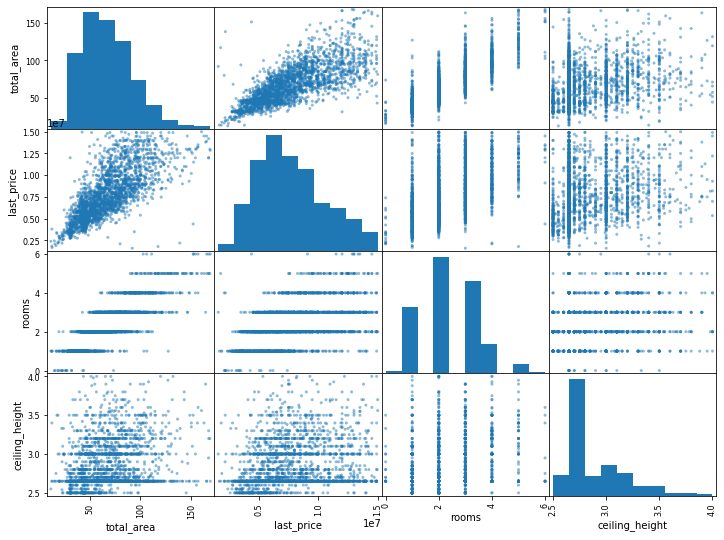

Матрица диаграмм рассеяния 1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb254401290>,
      dtype=object)

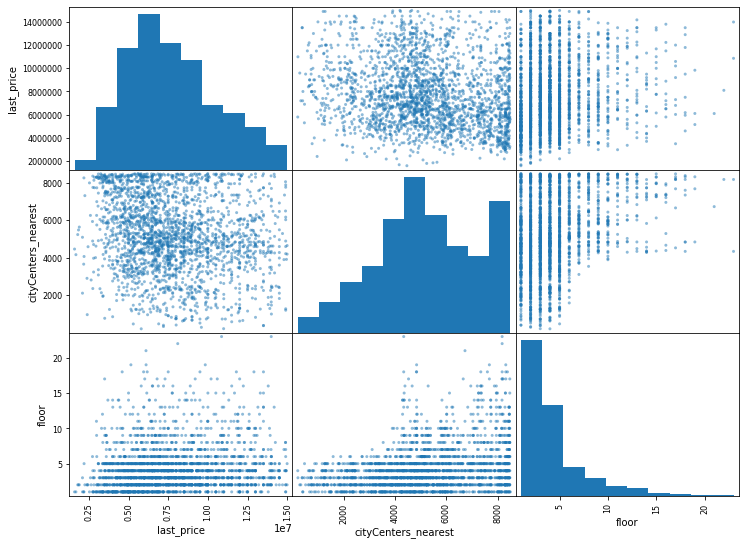

In [39]:
#сформируем матрицы корреляции
df_spb_Centre_1 = df_spb_Centre[['total_area', 'last_price', 'rooms', 'ceiling_height']]
df_spb_Centre_2 = df_spb_Centre[['last_price', 'cityCenters_nearest', 'first_day_exposition', 'floor']]
print('Матрица корреляции 1')
display(df_spb_Centre_1.corr())
print('Матрица корреляции 2')
display(df_spb_Centre_2.corr())

#сформируем матрицы диаграмм рассеяния
print('Матрица диаграмм рассеяния 1')
pd.plotting.scatter_matrix(df_spb_Centre_1, figsize=(12, 9)) 
plt.show()
print('Матрица диаграмм рассеяния 1')
pd.plotting.scatter_matrix(df_spb_Centre_2, figsize=(12, 9)) 

### Вывод 4.14
Для выявления факторов и степени их влияния на стоимость квартиры был использован коэф. корреляции Пирсона. Наиболее существенная корреляция наблюдается между ценой и площадью квартиры коэф. корреляции превышает 0,73, с увеличением площади, увеличивается и цена квартиры. Аналогичная динамика отражена на диаграмме рассеяния.<br>
Кроме этого, существенная корреляция Corr=0,5 наблюдается между ценой и количеством комнат. Также вполне логично ведь в большинстве случаев с увеличением количества комнат, растет и общая площадь квартиры. Очевидно, что за простор нужно платить. На диаграмме рассеяния 1 можно увидеть положительную динамику стоимости с увеличением количества комнат.<br>
Между ценой и высотой потолков нет существенной корреляции, вероятнее всего высокие потолки оказываю положительное воздействие на цену, однако высота потолков не первостепенна при ценообразовании стоимости квартиры, а является одним из множества факторов.<br>
Зависимость цены от удаления от центра весьма незначительная, cor = -0,18, это свидетельствует о том, что с уменьшением расстояни до центра, цена возрастает - обратная зависимость. Получение такой зависимости также вполне допустимо и не противоречит здравому смыслу.<br>
Зависимость стоимости квартиры от этажа расположения квартиры очень незначительна. Данный фактор оказывает незначительное воздействие, но не является существенным при формировании стоимости.

In [40]:
#посмотрим данные по всему городу 

# изучим общую информацию о параметрах: площадь, цена, число комнат, высота потолков
print('Общая информация о параметре площадь')
print(df_spb['total_area'].describe())
print('Общая информация о параметре цена')
print(df_spb['last_price'].describe())
print('Общая информация о параметре число комнат')
print(df_spb['rooms'].describe())
print('Общая информация о параметре высота потолков')
print(df_spb['ceiling_height'].describe())

#сформируем матрицы корреляции
df_spb_1 = df_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']]
df_spb_2 = df_spb[['last_price', 'cityCenters_nearest', 'first_day_exposition', 'floor']]
print('Матрица корреляции 3')
display(df_spb_1.corr())
print('Матрица корреляции 4')
display(df_spb_2.corr())

Общая информация о параметре площадь
count    11495.000000
mean        55.487055
std         21.220051
min         12.000000
25%         40.000000
50%         50.200000
75%         66.300000
max        172.000000
Name: total_area, dtype: float64
Общая информация о параметре цена
count    1.149500e+04
mean     5.812521e+06
std      2.515905e+06
min      1.190000e+06
25%      4.000000e+06
50%      5.090000e+06
75%      6.900000e+06
max      1.500000e+07
Name: last_price, dtype: float64
Общая информация о параметре число комнат
count    11495.00000
mean         1.97886
std          0.94230
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max          6.00000
Name: rooms, dtype: float64
Общая информация о параметре высота потолков
count    11495.000000
mean         2.688667
std          0.189876
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64
Матрица корреля

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.818522,0.799568,0.320164
last_price,0.818522,1.000000,0.540044,0.375529
rooms,0.799568,0.540044,1.000000,0.149412
ceiling_height,0.320164,0.375529,0.149412,1.000000


Матрица корреляции 4


,last_price,cityCenters_nearest,floor
last_price,1.000000,-0.377937,0.055839
cityCenters_nearest,-0.377937,1.000000,0.213483
floor,0.055839,0.213483,1.000000


Матрица диаграмм рассеяния 3


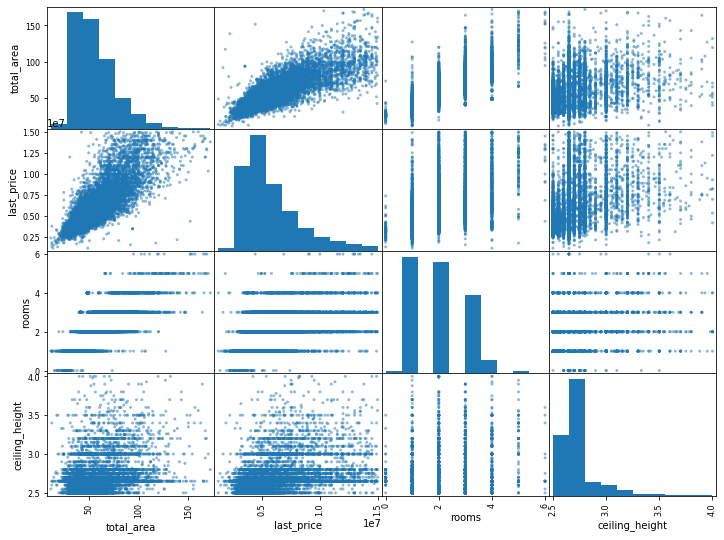

Матрица диаграмм рассеяния 4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb24a7994d0>,
      dtype=object)

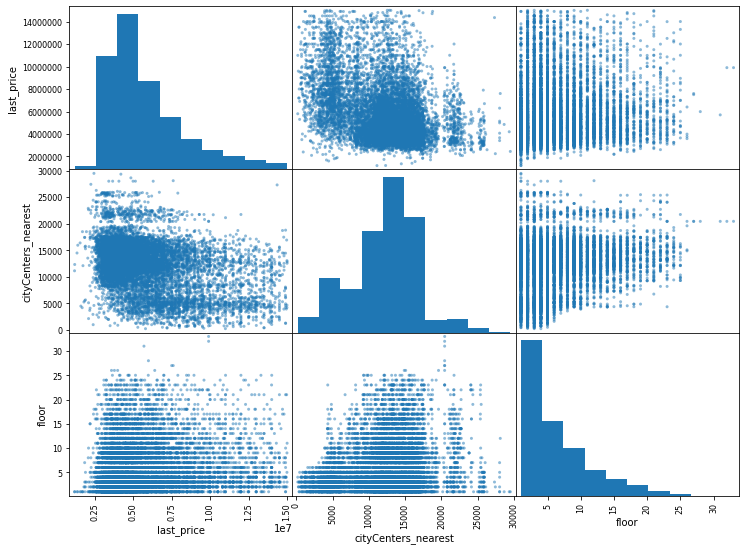

In [41]:
#сформируем матрицы диаграмм рассеяния
print('Матрица диаграмм рассеяния 3')
pd.plotting.scatter_matrix(df_spb_1, figsize=(12, 9)) 
plt.show()
print('Матрица диаграмм рассеяния 4')
pd.plotting.scatter_matrix(df_spb_2, figsize=(12, 9)) 

### Вывод 4.15:
При анализе информации по всему городу основные выводы остались без изменений. Наиболее существенно на стоимость влияют такие факторы как площадь квартиры и число комнат, при анализе данных по всему городу коэффициент корреляции вырос для обоих параметров. Также наблюдается более существенная роль высоты потолков при формировании стоимости квартиры, коэф. корреляции увеличился до 0,4 - почти в два раза. 
<br>Кроме этого, значительно увеличилось воздействие на стоимость расстояние до центра. Очевидно, что когда все квартиры и так в центре, то корреляция будет менее выражена, чем при анализе данных всего Санкт-Петербурга, где из-за отдаленности от центра цена падает в разы.
<br> Также при анализе данных по всему городу снизилась средняя стоимость и медиана стоимости квартир, снижение составило около 25% или в абсолютных значениях 2 млн. руб. Среднее значение и медиана площади также снизились на около 20%. Данные факторы вполне реалистичны, так как в выборку вошел не только центр, где, как правило, расположены элитные дома, но и отдаленные районы класса эконом.

### 5. Общий вывод  <a id="result"></a>

В результате проекта "Исследование объявлений о продаже квартир" нами был проведен анализ входных данных, определены направления предобработки данных. Затем на этапе предобработки данных были заполнены пропущенные значения, были применены методы удаления строк, формирования срезов, заполнения значениями медианы по группам и т.д. Также в рамках предобработки были заменены типы данных, где был изначально указан ошибочно или тип был неоптимален. По итогам предобработки данных была проведена проверка качества ее выполнения.
<br>Затем были проведены расчеты дополнительных параметров, применены инструменты категоризации данных, специальные методы для работы с датой и временем. <br>
Далее в рамках проекта были изучены такие параметры как общая площадь, цена, число комнат, удаленность от центра города, этаж, дата публикации объявления и т.д. Для изучения параметров были построены диаграммы размаха и гистограммы, которые позволили отфильтровать данные от выбросов. Также был применен метод discribe() для анализа среднего значения, медианы, квантилей и среднего отклонения. Затем после очистки данных от выбросов было проанализировано какие факторы влияют на цену объекта недвижимости. Анализ проводился с использованием таких инструментов как построение диаграмм рассеяния, столбчатых диаграмм, расчета коэффициентов корреляции Пирсона. В результате исследования было получено, что наибольшее влияние на цену квартиры оказывает ее общая площадь, чем больше площадь квартиры, тем выше стоимость. Вторым по значимости фактором, определяэщим ценообрахование стоимости квартиры является количество комнат. Очевидно, что количество комнат и площадь квартиры это напрямую связанные показатели. Кроме этого, было установлено, что наибольший спрос, а значит и наибольшая стоимость у квартир, расположенных не на первом и не на последнем этажах.<br>
Также были проанализированы параметры и их влияние на стоимость объектов недвижимости в центре Санкт-Петербурга и на всей его территории. В результате было выявлено, что при анализе всей территории города отрицательная корреляция показателя расстояния до центра города еще больше  снижается и демонстрирует обратную зависимость с ценой. Также цена имеет прямую зависимость от высоты потолков, однако данный фактор является одним из дополнительных и не оказывает существенного воздействия на стоимость. <br>
Тем не менее показатели площади и количества комнат неизменно остаются наиболее существенными при ценооброзовании на квартиры независимо от населенного пункта, и района. 
Кроме этого, при анализе 10 населенных пунктов с наибольшим количеством объявлений было выявлено, что наименьшая средняя стоимость жилья за квадратный метр в Выборге около 60 тыс. руб. за кв. м., а наибольшая стоимость характерна для центра субъекта,средняя стоимость жилья за квадратный метр в Санкт-Петербурге составляет 110 тыс. руб. за кв. м.